# Análisis de resultados de laboratorio de óptica
## Práctica 2

In [1]:
#!pip install zeus-mcmc

In [2]:
# show plots inline in the notebook
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Math
import matplotlib.gridspec as gridspec
import time
import zeus
import seaborn as sns

In [3]:
# Modelo lineal
def straight_line(x, m, c):
    ''' A straight line model: y = m*x + c '''
    return m*x + c
# Modelo cuadratico
def quadratic_line(x, d, m, c):
    ''' A quadratic model: y = d*x*x + m*x + c '''
    return  d*x*x+m*x + c

In [4]:

# primera parte
dataRefraccion = np.array([0,3,6,10,13,16,19,22,26,28])
dataRefleccion = np.array([0,6,10,16,21,25,30,35,41,45])
x = np.array([0,5,10,15,20,25,30,35,40,45])
# segunda parte
data = np.array([0,9,16,21,31,40,48,59,73,90])
x =    np.array([0,5,10,15,20,25,30,35,40,44])
sigma = 1

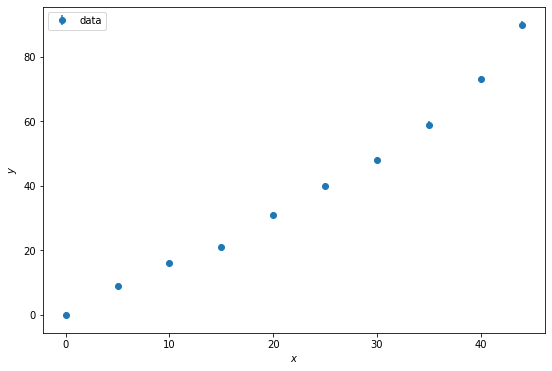

In [5]:
plt.figure(figsize=(9,6))
plt.errorbar(x, data, yerr=sigma, fmt="o", label='data')
# plt.plot(x, straight_line(x, m_true, c_true), '-', lw=2, label='lienal model')
# plt.plot(x, quadratic_line(x, d_true ,m_true, c_true), '-', lw=2, label='quadratic model')
plt.legend()
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.show()

In [6]:
def logprior(theta, p):
    ''' The natural logarithm of the prior probability. '''
    lp = 0.
    # unpack the model parameters from the tuple
    #Agregar parámetro d
    if p == 0:
      m, c = theta
    else: 
      d, m, c = theta

    # uniform prior on c
    cmin = -10. # lower range of prior
    cmax = 10.  # upper range of prior
    # set prior to 1 (log prior to 0) if in the range and zero (-inf) outside the range
    lp = 0. if cmin < c < cmax else -np.inf
    
     # uniform prior on m
    mmin = -15. # lower range of prior
    mmax = 15.  # upper range of prior
    
    # set prior to 1 (log prior to 0) if in the range and zero (-inf) outside the range
    lp += 0. if mmin < m < mmax else -np.inf
    
    if p == 1:
      # uniform prior on d
      dmin = -5 # lower range of prior
      dmax = 5  # upper range of prior
      # set prior to 1 (log prior to 0) if in the range and zero (-inf) outside the range
      lp += 0. if dmin < d < dmax else -np.inf
    return lp

Definimos el logaritmo del likelihood. Se puede evaluar un modelo cuadrático o un modelo lineal.

In [7]:
def loglike0(theta, data, sigma, x):
    '''The natural logarithm of the likelihood.'''
    # unpack the model parameters
    m, c = theta
    # evaluate the model
    lin_md = straight_line(x, m, c)
    # return the log likelihood
    return -0.5 * np.sum(((lin_md - data)/sigma)**2)

def loglike1(theta, data, sigma, x):
    '''The natural logarithm of the likelihood.'''
    # unpack the model parameters
    d, m, c = theta
    # evaluate the model
    quad_md = quadratic_line(x,d,m,c)
    # return the log likelihood
    return -0.5 * np.sum(((quad_md - data)/sigma)**2)
def loglike(theta, data, sigma, x, i):
  if i == 0:
    return loglike0(theta, data, sigma, x)
  else:
    return loglike1(theta, data, sigma, x)

In [8]:
def logpost(theta, data, sigma, x,p):
    '''The natural logarithm of the posterior.'''
    return logprior(theta,p) + loglike(theta, data, sigma, x, p)

In [9]:
#If a linear regression is desired,set p = 0, if not, we will have a quadratic regression with p = 1.
i = 0
ndim = i + 2 # Number of parameters/dimensions (e.g. m and c)

In [10]:
nwalkers = 10 # Number of walkers to use. It should be at least twice the number of dimensions.
nsteps = 5000 # Number of steps/iterations.

Inicializamos la posición aleatoria de los caminadores.

In [11]:
start = 0.01 * np.random.randn(nwalkers, ndim) # Initial positions of the walkers.
t0 = time.time()

In [12]:
#If a linear regression is desired,set p = 0, if not, we will have a 
#quadratic regression with p = 1.
i = 1
ndim = i + 2 # Number of parameters/dimensions (e.g. m and c)
start = 0.01 * np.random.randn(nwalkers, ndim) # Initial positions of the walkers.
t0 = time.time()
sampler00 = zeus.EnsembleSampler(nwalkers, ndim, logpost, args=[dataRefraccion, sigma, x,i]) # Initialise the sampler
sampler00.run_mcmc(start, nsteps) # Run sampling
    
sampler00.summary # Print summary diagnostics
print("Multiprocessing took {0:.1f} seconds".format(time.time()-t0))

Initialising ensemble of 10 walkers...
Sampling progress : 100%|██████████| 5000/5000 [00:14<00:00, 339.04it/s]
Summary
-------
Number of Generations: 5000
Number of Parameters: 3
Number of Walkers: 10
Number of Tuning Generations: 32
Scale Factor: 0.852287
Mean Integrated Autocorrelation Time: 5.0
Effective Sample Size: 10008.77
Number of Log Probability Evaluations: 251965
Effective Samples per Log Probability Evaluation: 0.039723


Multiprocessing took 14.8 seconds


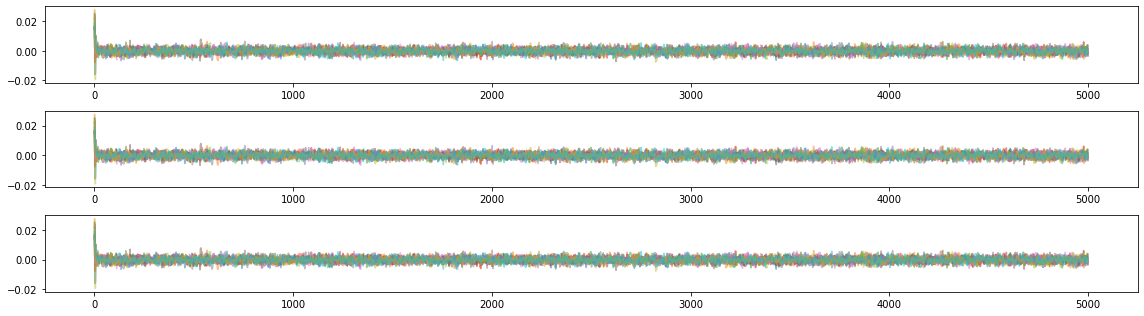

In [13]:
plt.figure(figsize=(16,1.5*ndim))
for n in range(ndim):
    plt.subplot2grid((ndim, 1), (n, 0))
    plt.plot(sampler00.get_chain()[:,:,0], alpha=0.5)
plt.tight_layout()
plt.show()

In [14]:

#If a linear regression is desired,set p = 0, if not, we will have a 
#quadratic regression with p = 1.
i = 1
ndim = i + 2 # Number of parameters/dimensions (e.g. m and c)
start = 0.01 * np.random.randn(nwalkers, ndim) # Initial positions of the walkers.
t0 = time.time()
sampler10 = zeus.EnsembleSampler(nwalkers, ndim, logpost, args=[dataRefleccion, sigma, x,i]) # Initialise the sampler
sampler10.run_mcmc(start, nsteps) # Run sampling
    
sampler10.summary # Print summary diagnostics
print("Multiprocessing took {0:.1f} seconds".format(time.time()-t0))


Initialising ensemble of 10 walkers...
Sampling progress : 100%|██████████| 5000/5000 [00:13<00:00, 361.96it/s]
Summary
-------
Number of Generations: 5000
Number of Parameters: 3
Number of Walkers: 10
Number of Tuning Generations: 31
Scale Factor: 0.837957
Mean Integrated Autocorrelation Time: 5.2
Effective Sample Size: 9612.29
Number of Log Probability Evaluations: 252308
Effective Samples per Log Probability Evaluation: 0.038097


Multiprocessing took 13.9 seconds


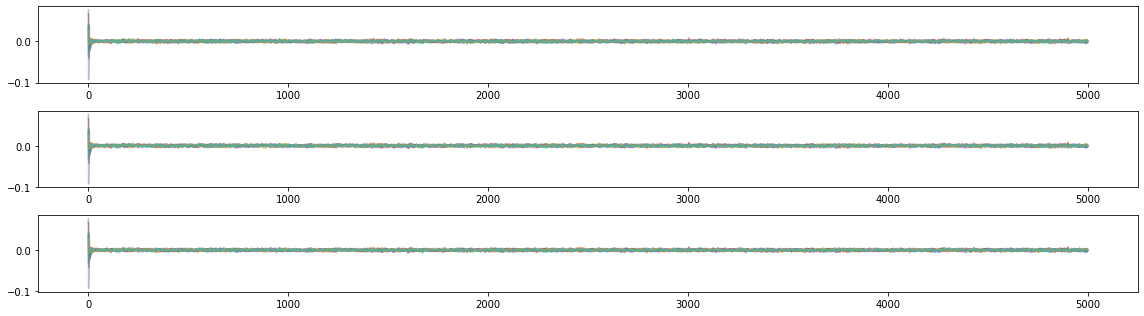

In [15]:
plt.figure(figsize=(16,1.5*ndim))
for n in range(ndim):
    plt.subplot2grid((ndim, 1), (n, 0))
    plt.plot(sampler10.get_chain()[:,:,0], alpha=0.5)
plt.tight_layout()
plt.show()


Graficamos los posteriors para cada parámetro, junto con una linea que marca el valor real y por encima de la gráfica, el valor máximo obtenido del posterior.
Obtenemos las cadenas chain0 (ajuste de modelo lineal) y chain1 (ajuste de modelo cuadrático).
Se puede elegir ver los priors del ajuste lineal descomentando la penúltima linea del código y comentando la última.

c:\Users\baruc\miniconda3\lib\site-packages\seaborn\distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
c:\Users\baruc\miniconda3\lib\site-packages\seaborn\distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
c:\Users\baruc\miniconda3\lib\site-packages\seaborn\distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
c:\Users\baruc\miniconda3\lib\site-packages\seaborn\distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
c:\Users\baruc\miniconda3\lib\site-packages\seaborn\distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
c:\Users\baruc\miniconda3\lib\site-packages\seaborn\distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'linewidth'
  c

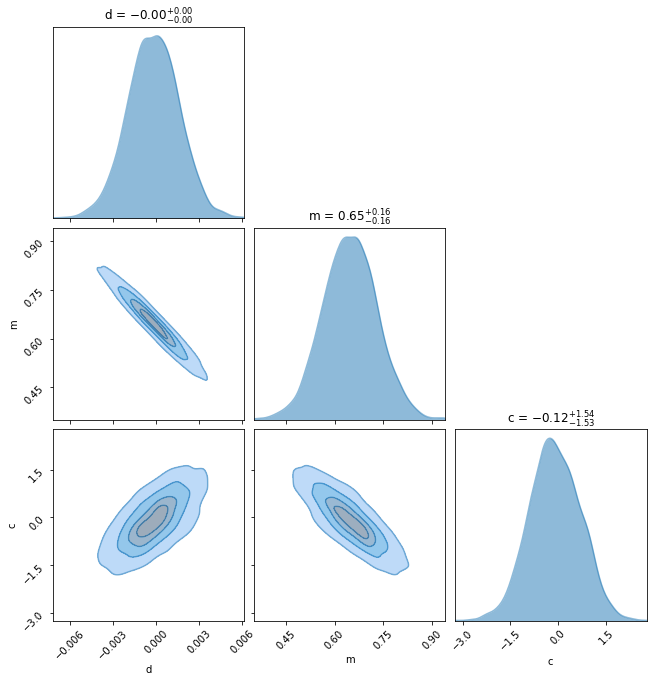

In [16]:

# flatten the chains, thin them by a factor of 10, and remove the burn-in (first half of the chain)
chain00 = sampler00.get_chain(flat=True, discard=nsteps//3, thin=10)
chain10 = sampler10.get_chain(flat=True, discard=nsteps//3, thin=10)

# plot marginal posterior distributions
# subfig, axes = zeus.cornerplot(chain0, labels=['m', 'c']);
subfig, axes = zeus.cornerplot(chain00, labels=['d','m', 'c']);


Calculamos el valor promedio de cada parámetro y su incertidumbre de 1$\sigma$.



Primero para el ajuste de un modelo lineal sobre los datos.

c:\Users\baruc\miniconda3\lib\site-packages\seaborn\distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
c:\Users\baruc\miniconda3\lib\site-packages\seaborn\distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
c:\Users\baruc\miniconda3\lib\site-packages\seaborn\distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
c:\Users\baruc\miniconda3\lib\site-packages\seaborn\distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
c:\Users\baruc\miniconda3\lib\site-packages\seaborn\distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
c:\Users\baruc\miniconda3\lib\site-packages\seaborn\distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'linewidth'
  c

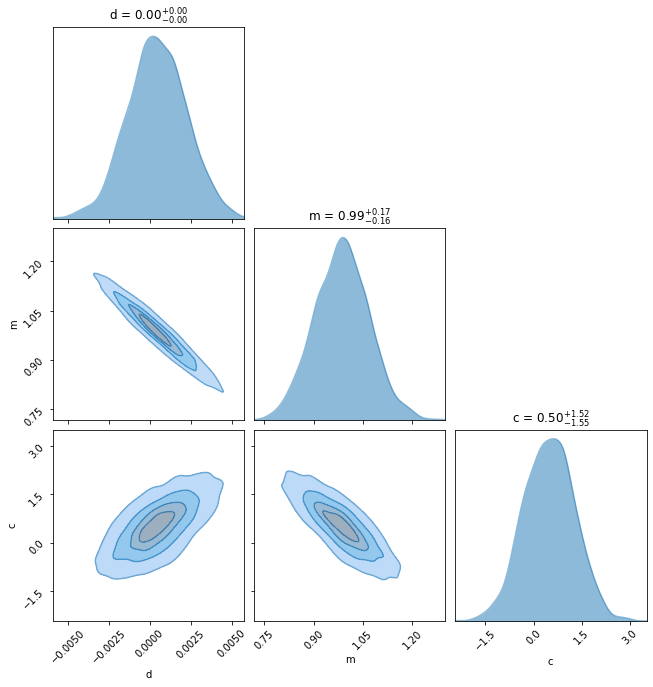

In [17]:
chain10 = sampler10.get_chain(flat=True, discard=nsteps//3, thin=10)

# plot marginal posterior distributions
# subfig, axes = zeus.cornerplot(chain0, labels=['m', 'c']);
subfig, axes = zeus.cornerplot(chain10, labels=['d','m', 'c']);

In [18]:
labels=['d','m','c']
for p in range(3):
    mcmc = np.percentile(chain10[:, p], [2.5, 50, 97.5])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[p])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Ahora lo calculamos para el ajuste de un modelo cuadrático sobre los datos.

In [19]:
labels=['d','m','c']
for p in range(3):
    mcmc = np.percentile(chain10[:, p], [2.5, 50, 97.5])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[p])
    display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Ahora grafiquemos la proyección de nuestros resultados en el espacio de los datos observados. La forma más sencilla de hacer esto es seleccionar al azar 100 muestras de la cadena y trazar los modelos respectivos en la parte superior de los puntos de datos.

In [20]:
d_fit00 = np.percentile(chain00[:, 0], 50)
m_fit00 = np.percentile(chain00[:, 1], 50)
c_fit00 = np.percentile(chain00[:, 2], 50)
###
d_fit10 = np.percentile(chain10[:, 0], 50)
m_fit10 = np.percentile(chain10[:, 1], 50)
c_fit10 = np.percentile(chain10[:, 2], 50)

Graficamos cada modelo ajustado a los datos y por último, graficamos el error relativo.

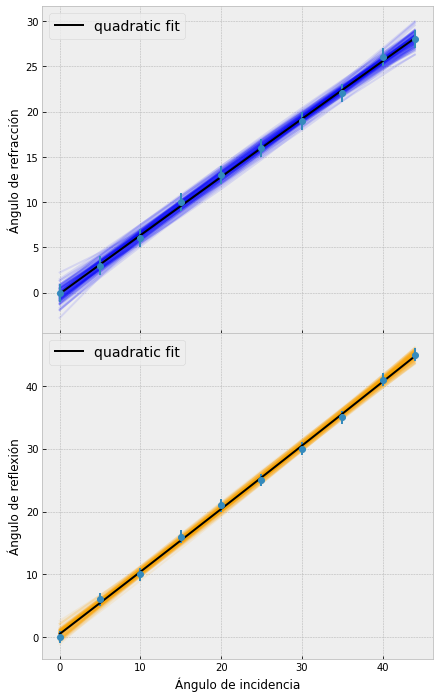

In [21]:
###
plt.style.use('bmh')
fig,(ax1,ax2,ax3)=plt.subplots(3,1,figsize=(7,12))
gs=gridspec.GridSpec(2,1, height_ratios=[2,2])
colors=['b','orange']
###
ax1=plt.subplot(gs[0])
inds = np.random.randint(len(chain00[:,1]), size=100)
for ind in inds:
    sample = chain00[ind]
    ax1.plot(x, np.dot(np.vander(x, 3), sample[:3]),colors[0], alpha=0.1)

ax1.errorbar(x, dataRefraccion, yerr=sigma, fmt="o")
# ax1.plot(x, straight_line(x,m_true,c_true), 'k--', label="truth")
ax1.plot(x, quadratic_line(x,d_fit00,m_fit00,c_fit00), 'k', label="quadratic fit")

###
inds = np.random.randint(len(chain10), size=100)
ax2=plt.subplot(gs[1])
for ind in inds:
    sample = chain10[ind]
    ax2.plot(x, np.dot(np.vander(x, 3), sample[:3]), colors[1], alpha=0.1)
ax2.errorbar(x, dataRefleccion, yerr=sigma, fmt="o")
# ax2.plot(x, quadratic_line(x,d_true,m_true,c_true), 'k--', label="truth")
ax2.plot(x, quadratic_line(x,d_fit10,m_fit10,c_fit10), 'k', label="quadratic fit")

###

ax1.legend(fontsize=14)
ax2.legend(fontsize=14)
models = ['quadratic model']
ax2.set_ylabel(r'Ángulo de reflexión')
ax2.set_xlabel(r'Ángulo de incidencia')
ax1.set_ylabel(r'Ángulo de refracción')
plt.setp(ax1.get_xticklabels(), visible=False)
plt.subplots_adjust(hspace=.0)



In [22]:
def funTheta(theta):
  return d_fit10*theta**2+m_fit10*theta + c_fit10
theta = np.random.normal(np.pi/4, 0.01, 100)
n_a = 1.00029
n_vidrio0 = n_a * np.sin(funTheta(theta))/np.sin(theta)

c:\Users\baruc\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Índice de refracción del vidrio')

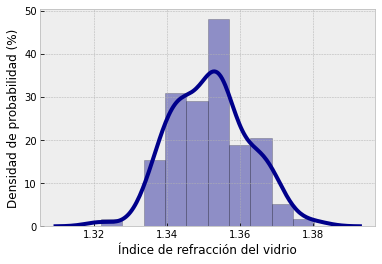

In [23]:
sns.distplot(n_vidrio0, hist=True, kde=True, 
             bins=int(10), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.ylabel('Densidad de probabilidad (%)')
plt.xlabel('Índice de refracción del vidrio')

In [24]:
labels=['mean']
mcmc = np.percentile(n_vidrio0[:], [2.5, 50, 97.5])
q = np.diff(mcmc)
txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
txt = txt.format(mcmc[1], q[0], q[1], labels[0])
display(Math(txt))

<IPython.core.display.Math object>

## Segunda parte

In [25]:
dataRefraccion = np.array([0,9,16,21,31,40,48,59,73,90])
dataRefleccion = np.array([0,6,10,16,21,25,30,35,41,45])


In [26]:
i = 1
ndim = i + 2 # Number of parameters/dimensions (e.g. m and c)
start = 0.01 * np.random.randn(nwalkers, ndim) # Initial positions of the walkers.
t0 = time.time()
sampler01 = zeus.EnsembleSampler(nwalkers, ndim, logpost, args=[dataRefraccion, sigma, x,i]) # Initialise the sampler
sampler01.run_mcmc(start, nsteps) # Run sampling
    
sampler01.summary # Print summary diagnostics
print("Multiprocessing took {0:.1f} seconds".format(time.time()-t0))

Initialising ensemble of 10 walkers...
Sampling progress : 100%|██████████| 5000/5000 [00:14<00:00, 353.14it/s]
Summary
-------
Number of Generations: 5000
Number of Parameters: 3
Number of Walkers: 10
Number of Tuning Generations: 38
Scale Factor: 0.797214
Mean Integrated Autocorrelation Time: 4.71
Effective Sample Size: 10608.15
Number of Log Probability Evaluations: 253385
Effective Samples per Log Probability Evaluation: 0.041866


Multiprocessing took 14.2 seconds


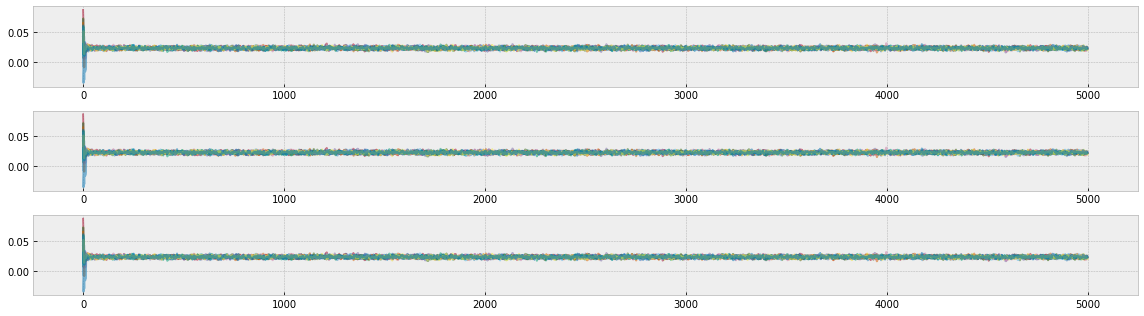

In [27]:
plt.figure(figsize=(16,1.5*ndim))
for n in range(ndim):
    plt.subplot2grid((ndim, 1), (n, 0))
    plt.plot(sampler01.get_chain()[:,:,0], alpha=0.5)
plt.tight_layout()
plt.show()

c:\Users\baruc\miniconda3\lib\site-packages\seaborn\distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
c:\Users\baruc\miniconda3\lib\site-packages\seaborn\distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
c:\Users\baruc\miniconda3\lib\site-packages\seaborn\distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
c:\Users\baruc\miniconda3\lib\site-packages\seaborn\distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
c:\Users\baruc\miniconda3\lib\site-packages\seaborn\distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
c:\Users\baruc\miniconda3\lib\site-packages\seaborn\distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'linewidth'
  c

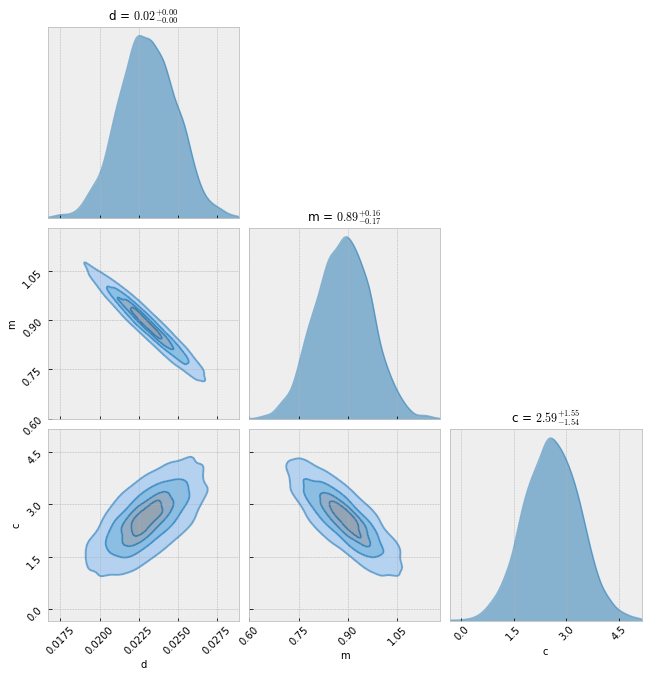

In [28]:
chain01 = sampler01.get_chain(flat=True, discard=nsteps//3, thin=10)

# plot marginal posterior distributions
# subfig, axes = zeus.cornerplot(chain0, labels=['m', 'c']);
subfig, axes = zeus.cornerplot(chain01, labels=['d','m', 'c']);

In [29]:
i = 1
ndim = i + 2 # Number of parameters/dimensions (e.g. m and c)
start = 0.01 * np.random.randn(nwalkers, ndim) # Initial positions of the walkers.
t0 = time.time()
sampler11 = zeus.EnsembleSampler(nwalkers, ndim, logpost, args=[dataRefleccion, sigma, x,i]) # Initialise the sampler
sampler11.run_mcmc(start, nsteps) # Run sampling
    
sampler11.summary # Print summary diagnostics
print("Multiprocessing took {0:.1f} seconds".format(time.time()-t0))

Initialising ensemble of 10 walkers...
Sampling progress : 100%|██████████| 5000/5000 [00:14<00:00, 355.73it/s]
Summary
-------
Number of Generations: 5000
Number of Parameters: 3
Number of Walkers: 10
Number of Tuning Generations: 40
Scale Factor: 0.741254
Mean Integrated Autocorrelation Time: 6.0
Effective Sample Size: 8331.54
Number of Log Probability Evaluations: 255812
Effective Samples per Log Probability Evaluation: 0.032569


Multiprocessing took 14.1 seconds


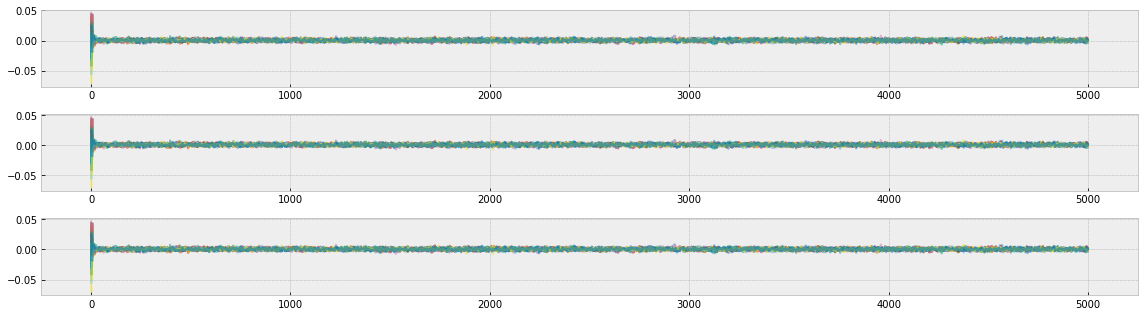

In [30]:
plt.figure(figsize=(16,1.5*ndim))
for n in range(ndim):
    plt.subplot2grid((ndim, 1), (n, 0))
    plt.plot(sampler11.get_chain()[:,:,0], alpha=0.5)
plt.tight_layout()
plt.show()

c:\Users\baruc\miniconda3\lib\site-packages\seaborn\distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
c:\Users\baruc\miniconda3\lib\site-packages\seaborn\distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
c:\Users\baruc\miniconda3\lib\site-packages\seaborn\distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
c:\Users\baruc\miniconda3\lib\site-packages\seaborn\distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
c:\Users\baruc\miniconda3\lib\site-packages\seaborn\distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'linewidth'
  cset = contour_func(
c:\Users\baruc\miniconda3\lib\site-packages\seaborn\distributions.py:1210: UserWarning: The following kwargs were not used by contour: 'linewidth'
  c

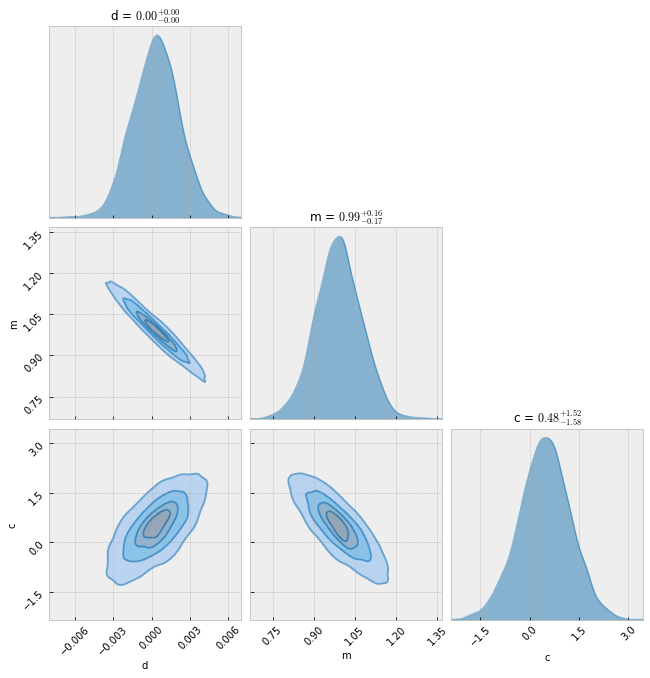

In [31]:
chain11 = sampler11.get_chain(flat=True, discard=nsteps//3, thin=10)

# plot marginal posterior distributions
# subfig, axes = zeus.cornerplot(chain0, labels=['m', 'c']);
subfig, axes = zeus.cornerplot(chain11, labels=['d','m', 'c']);

In [32]:
d_fit01 = np.percentile(chain01[:, 0], 50)
m_fit01 = np.percentile(chain01[:, 1], 50)
c_fit01 = np.percentile(chain01[:, 2], 50)
###
d_fit11 = np.percentile(chain11[:, 0], 50)
m_fit11 = np.percentile(chain11[:, 1], 50)
c_fit11 = np.percentile(chain11[:, 2], 50)

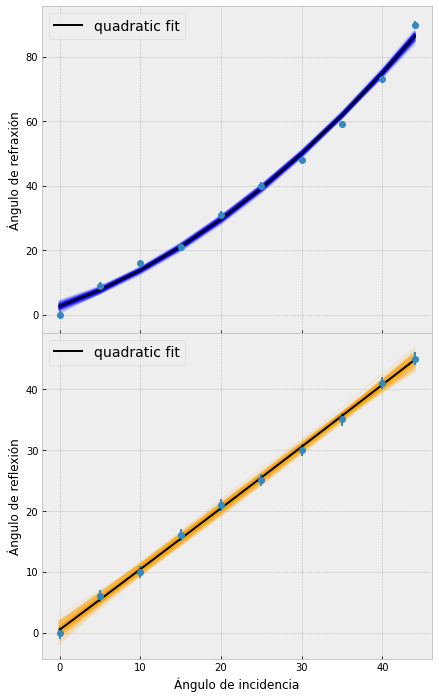

In [33]:
plt.style.use('bmh')
fig,(ax1,ax2,ax3)=plt.subplots(3,1,figsize=(7,12))
gs=gridspec.GridSpec(2,1, height_ratios=[2,2])
colors=['b','orange']
###
ax1=plt.subplot(gs[0])
inds = np.random.randint(len(chain01[:,1]), size=100)
for ind in inds:
    sample = chain01[ind]
    ax1.plot(x, np.dot(np.vander(x, 3), sample[:3]),colors[0], alpha=0.1)

ax1.errorbar(x, dataRefraccion, yerr=sigma, fmt="o")
# ax1.plot(x, straight_line(x,m_true,c_true), 'k--', label="truth")
ax1.plot(x, quadratic_line(x,d_fit01,m_fit01,c_fit01), 'k', label="quadratic fit")

###
inds = np.random.randint(len(chain11), size=100)
ax2=plt.subplot(gs[1])
for ind in inds:
    sample = chain11[ind]
    ax2.plot(x, np.dot(np.vander(x, 3), sample[:3]), colors[1], alpha=0.1)
ax2.errorbar(x, dataRefleccion, yerr=sigma, fmt="o")
# ax2.plot(x, quadratic_line(x,d_true,m_true,c_true), 'k--', label="truth")
ax2.plot(x, quadratic_line(x,d_fit11,m_fit11,c_fit11), 'k', label="quadratic fit")

###

ax1.legend(fontsize=14)
ax2.legend(fontsize=14)
models = ['quadratic model']
ax2.set_ylabel(r'Ángulo de reflexión')
ax2.set_xlabel(r'Ángulo de incidencia')
ax1.set_ylabel(r'Ángulo de refraxión')
plt.setp(ax1.get_xticklabels(), visible=False)
plt.subplots_adjust(hspace=.0)

In [43]:
def funTheta(theta):
  return d_fit11*theta**2+m_fit11*theta + c_fit11
theta = np.random.normal(np.pi/4, 0.01, 100)
n_a = 1.00029
n_vidrio1 = n_a * np.sin(funTheta(theta))/np.sin(theta)

c:\Users\baruc\miniconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Índice de refracción del vidrio')

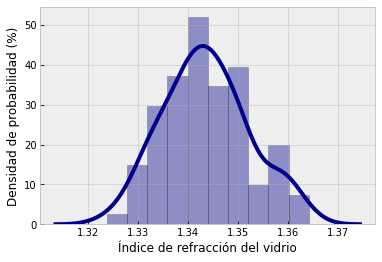

In [44]:
sns.distplot(n_vidrio1, hist=True, kde=True, 
             bins=int(10), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.ylabel('Densidad de probabilidad (%)')
plt.xlabel('Índice de refracción del vidrio')

In [45]:
labels=['mean']
mcmc = np.percentile(n_vidrio1[:], [2.5, 50, 97.5])
q = np.diff(mcmc)
txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
txt = txt.format(mcmc[1], q[0], q[1], labels[0])
display(Math(txt))

<IPython.core.display.Math object>